In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from preprocess_text import Preprocess
from sklearn.metrics import accuracy_score
from generate_word_embeddings import TextToTensor, Embeddings
from sklearn.preprocessing import LabelEncoder
from RNN_model import RnnModel
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Amey\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path1 = '../Technodifacation/Data/training_data_marathi.csv'
path2 = '../Technodifacation/Data/test_data_marathi.csv'

# Reading the data
train = pd.read_csv(path1)
test = pd.read_csv(path2)

# Defining variables
x_train = train['text'].tolist()
y_train = train['label'].tolist()
x_test = test['text'].tolist()
y_test = test['label'].tolist()
word_counts = train['text'].apply(lambda x: len(str(x).split(" ")))

In [3]:
print(word_counts.describe())

count    41997.000000
mean        27.040431
std         25.178213
min          2.000000
25%         13.000000
50%         20.000000
75%         32.000000
max        404.000000
Name: text, dtype: float64


In [4]:
#Identify common words
freq = pd.Series(' '.join(train['text']).split()).value_counts()[:20]
freq.to_frame()

,0
-,91017
",",53831
.,41529
आहे,38449
आणि,27693
आपण,21595
तर,18667
की,13137
ते,13037
हे,12953


In [5]:
print('Text: ',x_train[0],'\n\nClass',y_train[0])

Text:  प्रा . प्रताप हरिदास : होय , मला वाटते की हा एक महत्त्वाचा मुद्दा आहे , की भारतीय संदर्भामुळे आपण विशेषतः आमच्या शैक्षणिक प्रक्रियेद्वारे प्रवेश करू शकता जिथे प्रवेश परीक्षा असते आणि जी आपल्याला विभागांमध्ये ठेवते आणि काही आपण त्या विशिष्ट क्रियाकलापांवर अडकले आहात असे कसे वाटते . 

Class com_tech


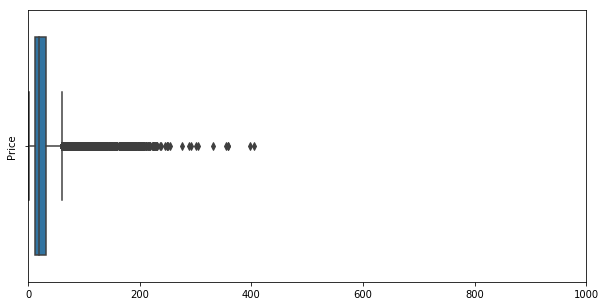

In [6]:
# Word Count Distribution accross training samples
plt.figure(figsize=(10,5))
plt.xlim(0,1000)
plt.ylabel('Price')
sns.boxplot(x=word_counts.values)
plt.show()

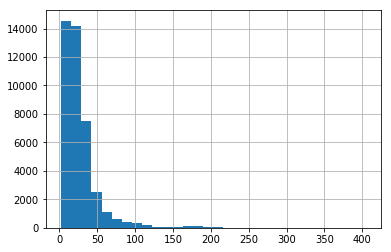

In [7]:
word_counts.hist(bins = 30)

In [8]:
#Cleaning Data

import re
stopword_list = []
with open ('../Technodifacation/Data/marathi_stopwords.txt','r',encoding='utf') as st:
    st_content = st.read()
    st_list = set(st_content.split())
    stopword_list = st_list

for key in freq.keys():
    stopword_list.add(key)
prepocess = Preprocess(stopword_list)
x_train = [prepocess.clean_text(x) for x in x_train]
x_train = [re.sub('[!#?,.:";-]', ' ', x) for x in x_train]

In [9]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

avg_len = np.mean([len(text.split()) for text in x_train])

In [10]:
#Identify common words after preprocessing

freq = pd.Series(' '.join(x_train).split()).value_counts()[:20]
freq.to_frame()

,0
परंतु,4080
करू,3812
असेल,3744
जर,3611
शकता,3418
जेव्हा,3379
कारण,3341
तेव्हा,3191
आवश्यक,2937
देखील,2841


In [11]:
print('Preprocessed Text: ',x_train[0],'\n\nClass:',y_train[0])

Preprocessed Text:  प्रा प्रताप हरिदास   होय मला वाटते महत्त्वाचा मुद्दा भारतीय संदर्भामुळे विशेषतः आमच्या शैक्षणिक प्रक्रियेद्वारे प्रवेश करू शकता जिथे प्रवेश परीक्षा असते जी विभागांमध्ये ठेवते विशिष्ट क्रियाकलापांवर अडकले आहात कसे वाटते 

Class: 1


In [12]:
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [13]:
# Creating the embedding matrix
embed_path = '../Technodifacation/Data/fasttext_marathi_embeddings_300.txt'
embed_dim = 300
embedding = Embeddings(embed_path, embed_dim)
# embedding_matrix = embedding.create_embedding_matrix(tokenizer, len(tokenizer.word_counts))
embedding_matrix = np.load('../Technodifacation/Data/marathi_train_embedding_matrix.npy')

In [14]:
# Vocab size * Embeddings Size
embedding_matrix.shape

(52355, 300)

In [15]:
# Creating the padded input for the deep learning model
max_len = np.max([len(text.split()) for text in x_train])
TextToTensor_instance = TextToTensor(
    tokenizer=tokenizer, 
    max_len= 35
    )
x_train = TextToTensor_instance.string_to_tensor(x_train)

In [16]:
x_train.shape

(41997, 35)

In [17]:
# Creating the model

rnn = RnnModel(
    embedding_matrix=embedding_matrix, 
    embedding_dim=embed_dim, 
    max_len= 35
)


In [ ]:
# Training the model
epochs = 5
batch_size = 256
rnn.model.fit(
            x_train,
            y_train, 
            batch_size=batch_size, 
            epochs=epochs
            )

Train on 41997 samples
Epoch 1/5
41997/41997 [==============================] - 285s 7ms/sample - loss: 1.3104 - accuracy: 0.4174
Epoch 2/5
41997/41997 [==============================] - 276s 7ms/sample - loss: 1.2908 - accuracy: 0.4285
Epoch 3/5
41997/41997 [==============================] - 277s 7ms/sample - loss: 1.2891 - accuracy: 0.4285
Epoch 4/5
 8960/41997 [=====>........................] - ETA: 3:38 - loss: 1.2834 - accuracy: 0.4371

In [ ]:
# Evaluating the model

x_test = [clean_text(text) for text in x_test]
x_test = TextToTensor_instance.string_to_tensor(x_test)
yhat = [x[0] for x in rnn.model.predict(x_test).tolist()]

print('Accuracy on test set: ',np.mean(yhat == y_test))